# LogisticRegression Exam one
- time : 2019-9-18
- author : HB

In [641]:
# import necessary package
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
# The package is used to get the optimal parameters
import scipy.optimize as opt;

# Get data

In [642]:
# get data
data = pd.read_csv('ex2data1.txt',names=['Score1','Score2','Admission']);
data.head()

,Score1,Score2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


# Plot data

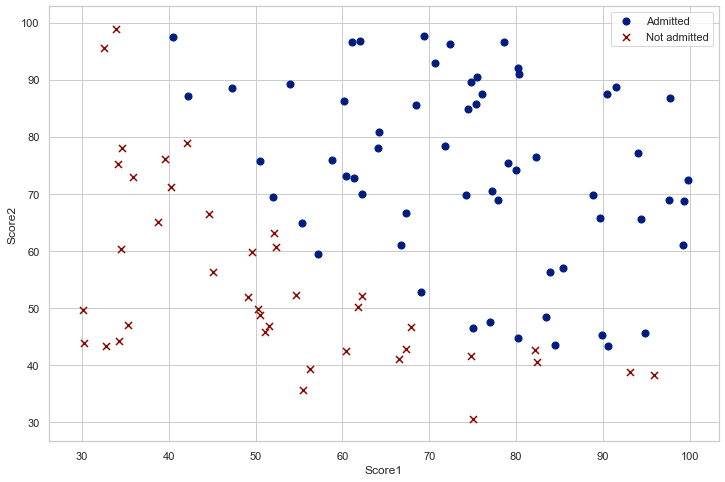

In [643]:
# plot data 
def plot_data(ax):
    pos = data[data['Admission'].isin([1])];  #data['Admission'].isin([1]) 从Admission列中找到值为1的行 表现为ture or false, 若索引为boolean类型，若值为True则进行显示　
    neg = data[data['Admission'].isin([0])];
    ax.scatter(pos['Score1'],pos['Score2'],s=50,c='b',marker='o',label='Admitted');
    ax.scatter(neg['Score1'],neg['Score2'],s=50,c='r',marker='x',label='Not admitted');
    ax.legend(loc=1);
    ax.set_xlabel('Score1');
    ax.set_ylabel('Score2');
    plt.show()

fig,ax = plt.subplots(1,1,figsize=(12,8));  # 创建一个画布
plot_data(ax);

# Public Function

In [644]:
# get X
def get_X(data):
    ones = pd.DataFrame({'ones': np.ones(len(data))});
    data = pd.concat([ones,data],axis=1);
    return data.iloc[:,:-1].values;
# get y
def get_y(data):
    return data.iloc[:,-1].values;
# sigmoid function
def sigmoid(z):
    sigmoid = 1/(1+np.exp(-z)); # 1/vector 已经是点乘
    return sigmoid;
# predict function(about data set)
def predict(theta,X):
    probability = sigmoid(X*theta);
    return [1 if x>=0.5 else 0 for x in probability ];

# sigmoid function testing
# nums = np.arange(-10,10,step=1);
# fig,ax = plt.subplots(figsize=(12,8));
# ax.plot(nums,sigmoid(nums),'r');
# plt.show();

# Cost Function

In [645]:
# cost&gradient function（we can get cost & gradient）
def cost(theta,X,y):
    theta = np.matrix(theta).T;
    z = X*theta;
    h = sigmoid(z);
    m = len(X);
    # The implement of cost
    costError0 = np.multiply((1-y),np.log(1-h));
    costError1 = np.multiply(y,np.log(h)); 
    J = -(np.sum(costError0+costError1))/m;
    # The implement of gradient
    Error = X.T*(h-y);
    gradient = (1/m)*Error;
    return J,gradient;

# The test of Cost&Gradient

In [646]:
# initial parameter
X = get_X(data);
y = get_y(data);
theta = np.zeros(3);
# 进行矩阵转换
X = np.matrix(X);
y = np.matrix(y).T;  #为了统一, 把y转换为列向量

# cost & gradient testing  
J,gradient = cost(theta,X,y);
J
gradient

matrix([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]])

# Find the optimal parameters with SciPy's truncated newton (TNC)

In [647]:
# 截断牛顿法,  func：优化的目标函数， x0：初值 ，fprime：提供优化函数func的梯度函数，不然优化函数func必须返回函数值和梯度，或者设置approx_grad=True，
#approx_grad :如果设置为True，会给出近似梯度, args：元组，是传递给优化函数的参数
result = opt.fmin_tnc(func=cost, x0=theta, fprime=None, args=(X, y))  
result

(array([-25.16131881,   0.20623159,   0.20147149]), 36, 0)

# Plot desicion boundary

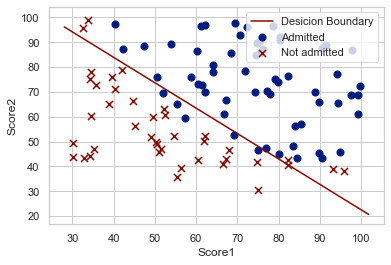

In [648]:
theta_better = np.matrix(result[0]).T;
plot_x = [X[:,1].min()-2,X[:,1].max()+2];
tmp = ((-1/theta_better[2])*(theta_better[1]*plot_x+theta_better[0])); # 为啥y是matrix 因为theta_better为matrix
plot_y = [tmp[0,0],tmp[0,1]];  # 把matrix转换为list
fig,ax = plt.subplots(1,1,figsize=(6,4));
ax.plot(plot_x,plot_y,'r',label='Desicion Boundary');
plot_data(ax);
plt.show()

# Test accuracy rate

In [649]:
theta_better = np.matrix(result[0]).T;
predictions = predict(theta_better,X);
# zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
# e.g. a = [1,2,3]  b = [4,5,6] zipped = zip(a,b) [(1, 4), (2, 5), (3, 6)]
correct = [1 if ((a==1 and b ==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y)];
accuracy = (sum(map(int,correct))) % len(predictions);
print('The accuracy is {0}%'.format(accuracy));

The accuracy is 89%
